# CIFAR10 Classification using CNN

A CNN model created to classify the CIFAR10 dataset into 10 categories:
* Airplane
* Automobile
* Bird
* Cat
* Deer 
* Dog
* Frog
* Horse 
* Ship
* Truck

## Importing necessary modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

## Gathering CIFAR10 dataset and splitting it into train and test dataset

In [2]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train[:8]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

## Data Visualization

In [7]:
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

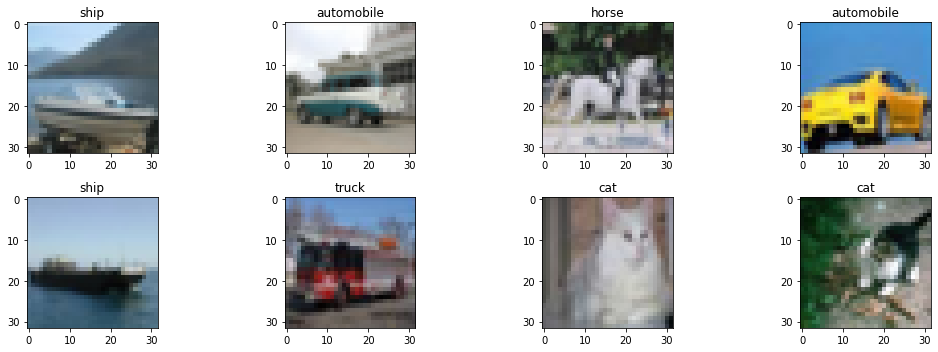

In [8]:
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,5)
for i in range(2):
    for j in range (4):
        m=rn.randint(0,len(y_train))
        ax[i,j].imshow(X_train[m])
        ax[i,j].set_title(categories[y_train[m]])
        
plt.tight_layout()

## Reshaping pixel values of images

In [9]:
X_train = X_train/255
X_test = X_test/255

## Building CNN Model

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)       

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

## Training our CNN Model

In [15]:
history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=100,
              validation_data=(X_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 37s 5ms/step - loss: 1.8117 - accuracy: 0.3342 - val_loss: 1.4920 - val_accuracy: 0.4617
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4787 - accuracy: 0.4625 - val_loss: 1.3728 - val_accuracy: 0.5081
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3464 - accuracy: 0.5184 - val_loss: 1.2319 - val_accuracy: 0.5658
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2471 - accuracy: 0.5562 - val_loss: 1.1361 - val_accuracy: 0.6011
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1645 - accuracy: 0.5893 - val_loss: 1.0667 - val_accuracy: 0.6226
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1010 - accuracy: 0.6139 - val_loss: 1.0501 - val_accuracy: 0.6348
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0511 - accuracy: 0.6301 - val_loss: 1.0134 - val_a

## Performance of our CNN Model

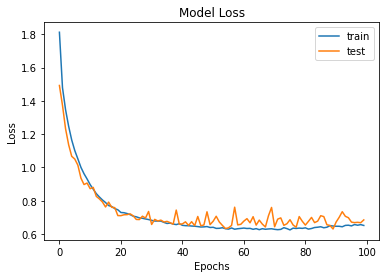

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

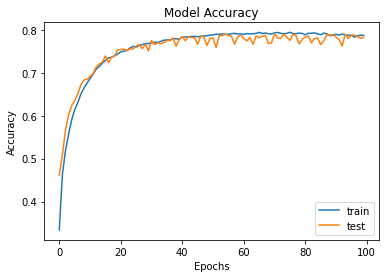

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [64]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.7821


[0.6846508383750916, 0.7821000218391418]

In [65]:
model.save("model_cnn.h5")

## Results

In [66]:
predictions = model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)

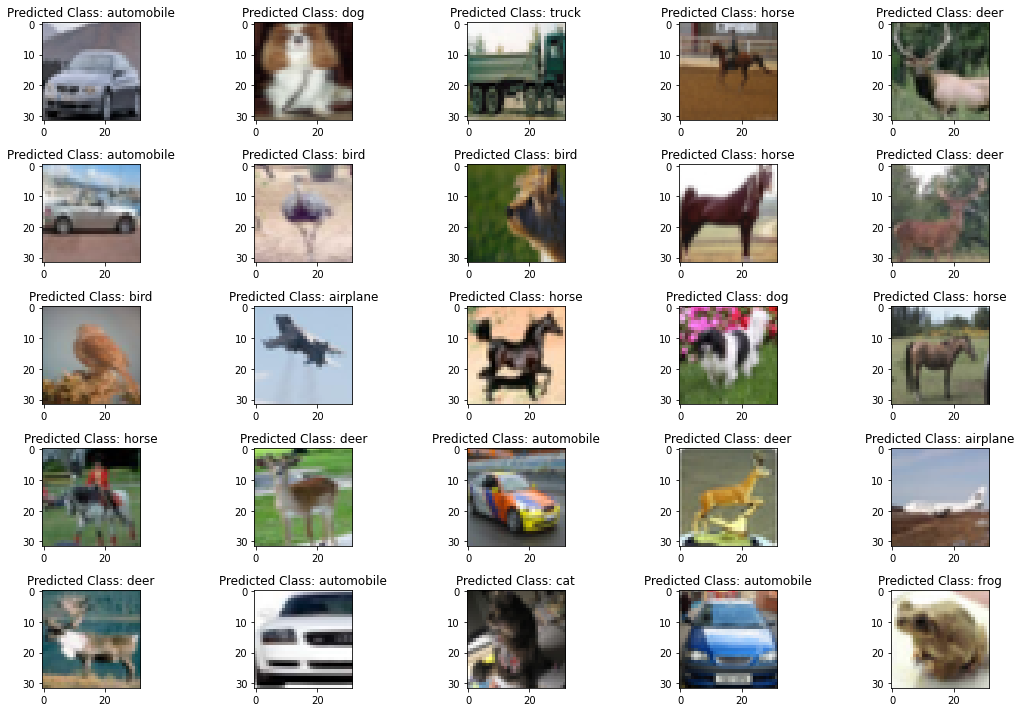

In [85]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,10)
for i in range(5):
    for j in range (5):
        m=rn.randint(0,len(y_test))
        ax[i,j].imshow(X_test[m])
        ax[i,j].set_title("Predicted Class: "+ categories[Y_pred_classes[m]])

plt.tight_layout()